<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%207%20/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

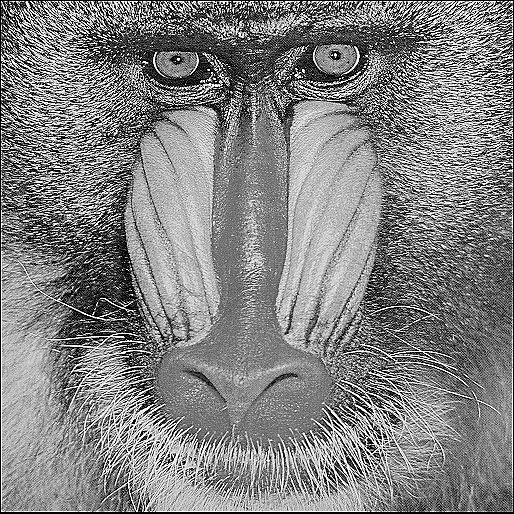

In [3]:
def convolution2d(image, kernel, stride, padding) :
  # Add padding to the image
  padded_image = np.pad(image, ((padding,padding), (padding,padding)), mode='constant')

  # Get the dimensions of the kernel and the padded image
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = padded_image.shape

  # Calculate the dimensions of the output image
  output_height = int(((padded_height - kernel_height) / stride) + 1)
  output_width = int(((padded_width - kernel_width) / stride) + 1)

  # Create an empty output image
  output_image = np.zeros((output_height, output_width), dtype=np.float32)

  # Iterate over the image with the given stride
  for y in range(0, padded_height - kernel_height + 1, stride) :
    for x in range(0, padded_width - kernel_width + 1, stride) :
      # Extract the patch of the image that overlaps with the kernel
      patch = padded_image[y:y+kernel_height, x:x+kernel_width]

      # Compute the dot product between the patch and the kernel
      convolution = np.sum(patch * kernel)

      # Set the value of the output pixel at this location
      output_y = int(y / stride)
      output_x = int(x / stride)
      output_image[output_y, output_x] = convolution

  return output_image

img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

result = convolution2d(img_gray, kernel_sharpen, 1, 2)
cv2_imshow(result)

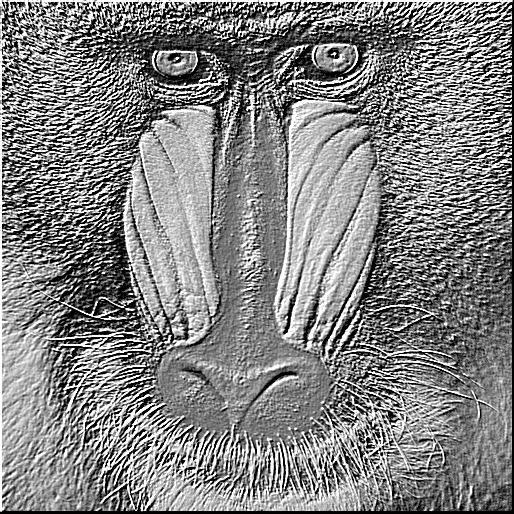

In [4]:
kernel_sharpen2 = np.array([
    [-2,-1,0],
    [-1,1,1],
    [0,1,2]
])

result2 = convolution2d(img_gray, kernel_sharpen2, 1, 2)
cv2_imshow(result2)

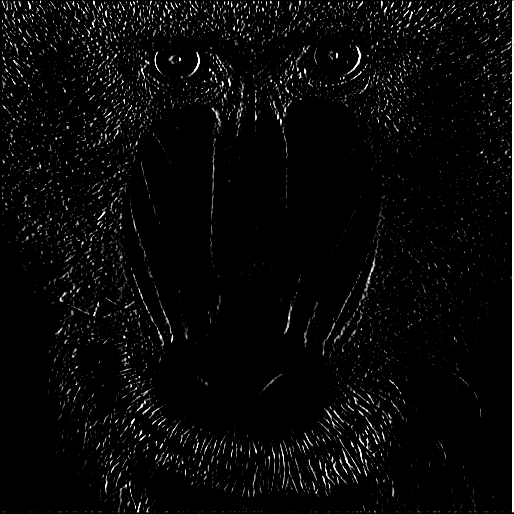

In [5]:
kernel_sharpen3 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-2]
])

result3 = convolution2d(img_gray, kernel_sharpen3, 1, 2)
cv2_imshow(result3)

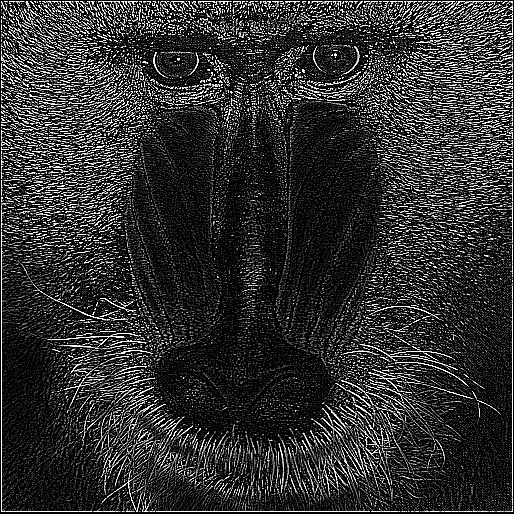

In [6]:
kernel_sharpen4 = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

result4 = convolution2d(img_gray, kernel_sharpen4, 1, 2)
cv2_imshow(result4)

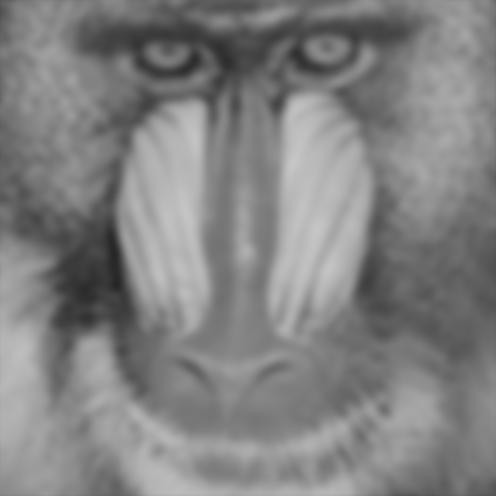

In [7]:
size = 21
sigma=math.sqrt(size)
gaussian_kernel = cv.getGaussianKernel(size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result5 = convolution2d(img_gray, gauss_kernel, 1, 2)
cv2_imshow(result5)